In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\praji\Downloads\CarPrice_Assignment.csv")

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:

#Data preprocessing

df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [4]:

df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [5]:
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [6]:
df['doornumber'] 

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [7]:
df = df.drop(columns=['CarName'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#checking is there any missing values or null values
df.isna().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,6,...,True,False,False,False,False,False,False,True,False,False
3,4,2,4,front,99.8,176.6,66.2,54.3,2337,4,...,False,False,False,False,False,False,False,True,False,False
4,5,2,4,front,99.4,176.6,66.4,54.3,2824,5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,front,109.1,188.8,68.9,55.5,2952,4,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,4,front,109.1,188.8,68.8,55.5,3049,4,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,4,front,109.1,188.8,68.9,55.5,3012,6,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,4,front,109.1,188.8,68.9,55.5,3217,6,...,False,False,False,False,False,True,False,False,False,False


In [11]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [12]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [19]:
x_train


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
86,1,4,96.3,172.4,65.4,51.6,2405,4,122,3.35,...,False,False,False,True,False,False,False,False,False,False
137,2,4,99.1,186.6,66.5,56.1,2847,4,121,3.54,...,False,False,False,False,False,False,False,True,False,False
70,-1,4,115.6,202.6,71.7,56.3,3770,5,183,3.58,...,False,False,False,False,False,True,False,False,False,False
204,-1,4,109.1,188.8,68.9,55.5,3062,4,141,3.78,...,False,False,False,False,False,False,False,True,False,False
54,1,4,93.1,166.8,64.2,54.1,1950,4,91,3.08,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,4,100.4,181.7,66.5,55.1,3095,6,181,3.43,...,True,False,False,False,False,False,False,True,False,False
16,0,2,103.5,193.8,67.9,53.7,3380,6,209,3.62,...,False,False,False,False,False,False,False,True,False,False
68,-1,4,110.0,190.9,70.3,58.7,3750,5,183,3.58,...,False,False,False,False,False,True,False,False,False,False
164,1,2,94.5,168.7,64.0,52.6,2204,4,98,3.19,...,False,False,False,True,False,False,False,False,False,False


In [20]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
37,0,2,96.5,167.5,65.2,53.3,2236,4,110,3.15,...,False,False,True,False,False,False,False,False,False,False
100,0,4,97.2,173.4,65.2,54.7,2302,4,120,3.33,...,False,False,False,True,False,False,False,False,False,False
123,-1,4,103.3,174.6,64.6,59.8,2535,4,122,3.35,...,False,False,False,True,False,False,False,False,False,False
30,2,2,86.6,144.6,63.9,50.8,1713,4,92,2.91,...,False,False,True,False,False,False,False,False,False,False
97,1,4,94.5,170.2,63.8,53.5,2037,4,97,3.15,...,False,False,False,True,False,False,False,False,False,False
136,3,2,99.1,186.6,66.5,56.1,2808,4,121,3.54,...,False,False,False,False,False,False,False,True,False,False
133,2,4,99.1,186.6,66.5,56.1,2695,4,121,3.54,...,False,False,False,False,False,False,False,True,False,False
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,False,False,False,False,False,False,False,True,False,False
29,3,2,95.9,173.2,66.3,50.2,2811,4,156,3.60,...,False,False,False,False,False,False,True,False,False,False
145,0,4,97.0,172.0,65.4,54.3,2510,4,108,3.62,...,False,False,False,False,False,False,False,True,False,False


In [21]:


reg=LinearRegression()

In [22]:
reg.fit(x_train,y_train)

LinearRegression()

# Linear Regression 

In [23]:
#making predictions
pred=reg.predict(x_test)
pred


array([ 8339.63578644, 11645.89060231, 11797.51478734,  4274.85658996,
        4534.57777963, 10946.38688219, 12208.48352984, 13657.52762333,
       16128.49757196, 13899.24282667,  9248.16208443,  7346.31129364,
       18817.23171009, 16169.85298431,  6276.16582931,  7772.6691369 ,
        6815.19905215, 17760.49433959,  6297.47016984,  9658.8487918 ,
        6260.8082793 ,  8248.1842387 , 11412.81010726,  6567.73072455,
       18485.87209248,  9646.66533659,  8956.67360434, 12570.35312734,
       26352.25211429, 20385.97186873, 15566.23117402, 20223.00987631,
        9320.84700029, 21788.7116785 , 17371.93448716,  7680.17868704,
       13846.95518531, 10798.89410668, 17760.49433959, 13589.08644585,
        8298.7482864 ])

In [24]:
reg.coef_

array([ 4.51791081e+02,  3.69339317e+02,  1.81705562e+02, -6.47344550e+01,
        3.81977924e+02,  4.93481631e+02,  3.56202145e+00,  9.02469053e+02,
        1.36211204e+02, -5.55891483e+03, -2.42324729e+03, -1.68010738e+03,
        2.54544036e+01,  3.29944809e+00,  6.92144720e+00,  2.14999587e+02,
        7.32435455e+03, -7.32435455e+03, -4.42122735e+02,  4.42122735e+02,
        5.82575434e+03, -2.83925714e+02, -1.38882548e+03, -1.09622031e+03,
       -3.05678283e+03, -1.40756200e+03, -6.41112006e+02,  2.04867400e+03,
       -3.63769175e+03, -1.38130514e+03, -3.32314498e+03,  4.89438412e+02,
        4.07868365e+03, -6.63779947e+03,  1.04118193e+04, -1.86784502e+03,
       -2.47549745e+02, -2.02692742e+03,  7.32435455e+03,  0.00000000e+00,
       -4.25010306e+02, -2.82588379e+03,  6.88617312e+01])

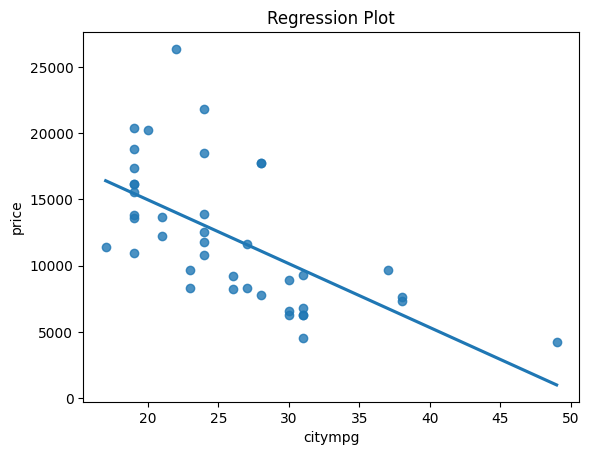

In [25]:
sns.regplot(x=x_test.citympg, y=pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

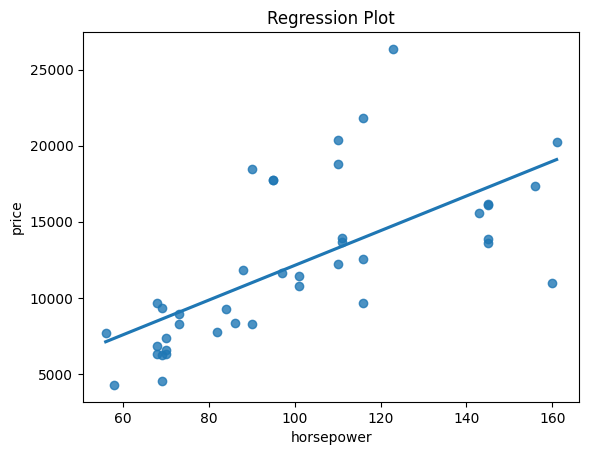

In [26]:
sns.regplot(x=x_test.horsepower, y=pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

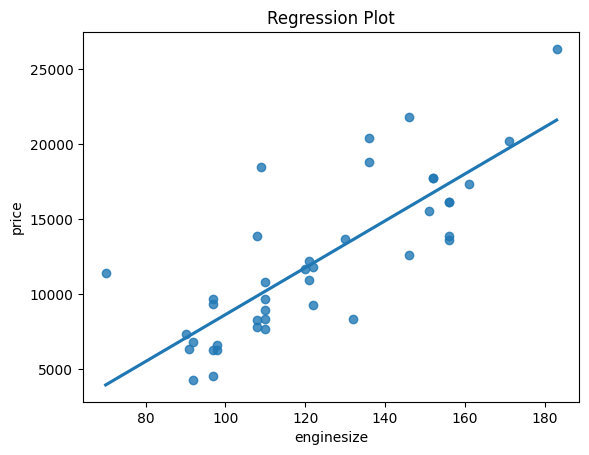

In [27]:

sns.regplot(x=x_test.enginesize, y=pred, ci=None)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

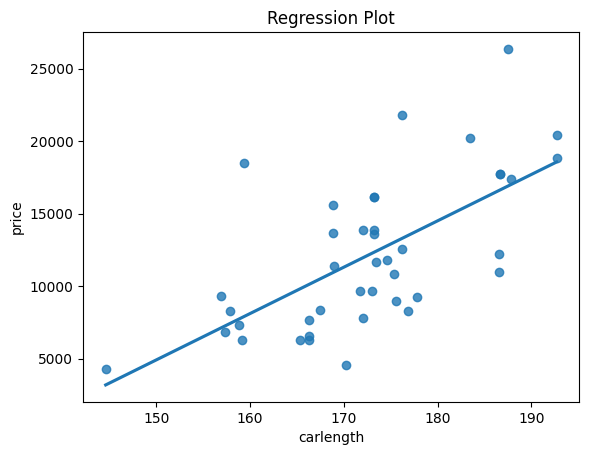

In [28]:
sns.regplot(x=x_test.carlength, y=pred, ci=None)
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()

In [29]:
reg.score(x_test,y_test)

0.7035325177630736

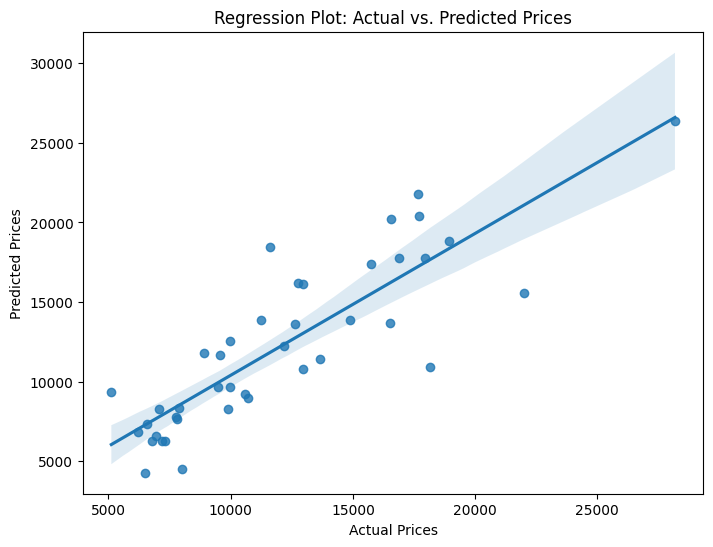

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.show()

# Evaluation of model

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import r2_score

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, pred)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 7313034.673745007
Root Mean Squared Error (RMSE): 2704.262316001354
Mean Absolute Error (MAE): 2014.5142858521735
R-squared (coefficient of determination): 0.7035325177630736


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [33]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [34]:

pred_d

array([36880.        , 23875.        ,  9383.66666667, 11932.        ,
       31600.        ,  6434.44444444,  7957.16666667,  7957.16666667,
        9383.66666667,  7995.        , 24565.        ,  7957.16666667,
       12764.        , 11248.        , 45400.        ,  6693.5       ,
        5472.75      , 12764.        ,  7262.33333333,  9383.66666667,
       10245.        , 14255.66666667,  6434.44444444,  5472.75      ,
        7609.        , 36880.        ,  9989.        , 15801.25      ,
        7122.        , 15801.25      , 31600.        ,  7609.        ,
        9136.5       , 18179.4       ,  7957.        , 31600.        ,
        9383.66666667, 13295.        ,  6575.        , 14255.66666667,
        7957.16666667,  8845.        , 16695.        ,  9136.5       ,
        7122.        ,  7957.16666667,  7609.        ,  7957.16666667,
       17950.        , 12764.        ,  8916.5       , 18179.4       ,
        5472.75      , 10898.        ,  7122.        , 16500.        ,
      

# Evaluation

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred_d)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_d)
r_squared = r2_score(y_test, pred_d)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 8648624.418737555
Root Mean Squared Error (RMSE): 2940.854368842081
Mean Absolute Error (MAE): 1973.0539372759856
R-squared (coefficient of determination): 0.8751720865209603


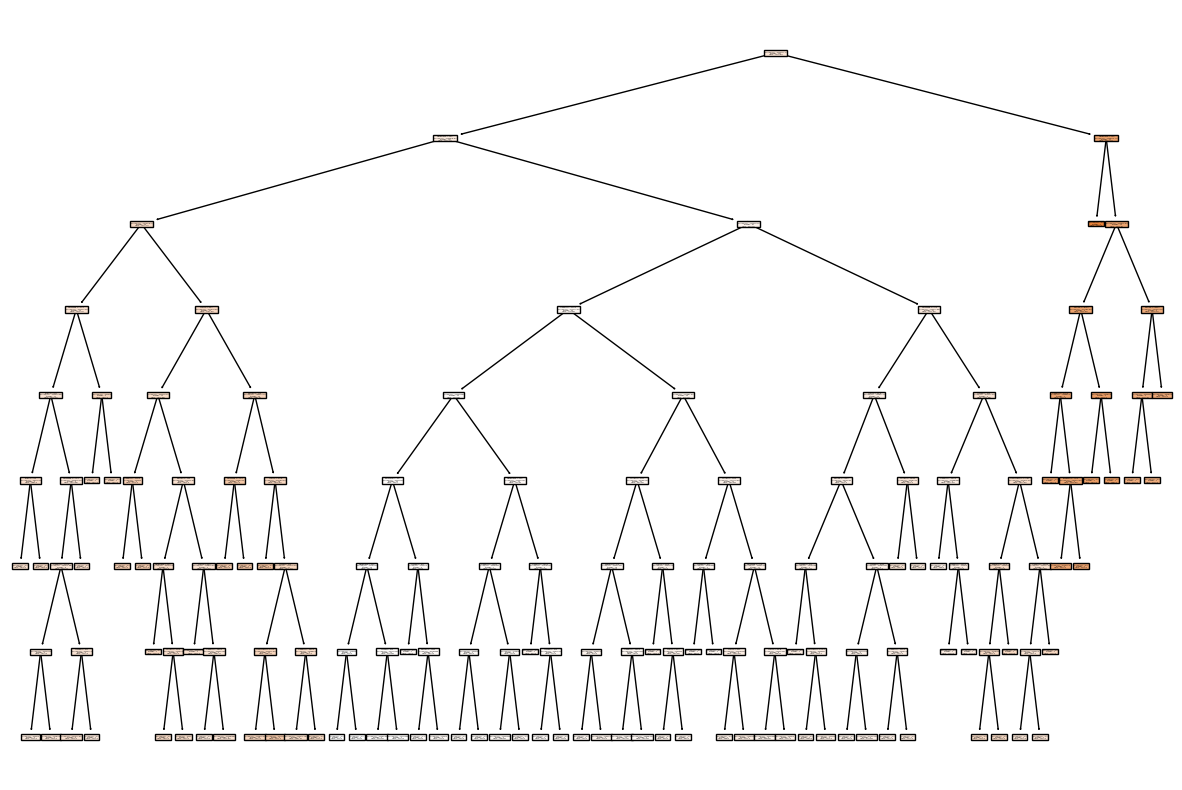

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=x.columns.tolist())
plt.show()


# Random Forest Regressor

In [37]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [40]:
df=pd.read_csv(r"C:\Users\praji\Downloads\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [41]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [42]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [43]:
df = df.drop(columns=['CarName'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [44]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,6,...,True,False,False,False,False,False,False,True,False,False
3,4,2,4,front,99.8,176.6,66.2,54.3,2337,4,...,False,False,False,False,False,False,False,True,False,False
4,5,2,4,front,99.4,176.6,66.4,54.3,2824,5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,front,109.1,188.8,68.9,55.5,2952,4,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,4,front,109.1,188.8,68.8,55.5,3049,4,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,4,front,109.1,188.8,68.9,55.5,3012,6,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,4,front,109.1,188.8,68.9,55.5,3217,6,...,False,False,False,False,False,True,False,False,False,False


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])

In [46]:
df.columns

Index(['car_ID', 'symboling', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [47]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [48]:
# Step2: Split the training test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# Step 3: Fit a Decision Tree model as comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit a Decision Tree Regressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([36880. , 18420. ,  8949. , 12170. , 33900. ,  5118. ,  7995. ,
        8195. ,  8845. ,  7995. , 15250. ,  8058. , 12170. , 11248. ,
       45400. ,  6669. ,  5399. , 12964. ,  6989. ,  9233. , 10245. ,
       14399. ,  7099. ,  5389. ,  7609. , 36880. ,  8449. , 16515. ,
        7349. , 15985. , 33900. ,  6229. ,  8499. , 22018. ,  7957. ,
       33278. , 11694. , 11845. ,  8916.5, 14869. ,  8845. ])

# Evaluation

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)

Mean Squared Error (MSE): 7126409.259850951
Root Mean Squared Error (RMSE): 2669.5335285122287
Mean Absolute Error (MAE): 1746.0690975609755
R-squared (coefficient of determination): 0.9097283216582741


# SVM

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

In [52]:
pred_s

array([32400.74592935, 17117.25836154,  8954.87363835, 12170.20020552,
       28327.36664235,  7043.54744755,  7907.32758889,  7621.13801183,
        8989.48592778,  7708.47578212, 14030.17142056,  7432.92958919,
       13866.17949324, 11067.15936153, 41041.88598691,  6625.8320606 ,
        5955.99365935, 12652.44255649,  8203.01889435,  8674.45316965,
       10015.96015522, 14752.85003503,  7064.08247777,  6497.52648695,
        6691.04772348, 31826.40541105, 10142.94385313, 14642.97348713,
        7122.33112416, 14885.03699004, 28985.3351888 ,  6737.75949413,
        6868.11831646, 18010.80256264,  8078.32469178, 27974.26020752,
        9506.06874937, 10919.19501256,  6992.73060516, 13405.65503784,
        8028.22485903])

# Evaluation

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 4094377.792734273
Root Mean Squared Error (RMSE): 2023.4568917410306
Mean Absolute Error (MAE): 1193.9928755580754
R-squared (coefficient of determination): 0.94813568213132


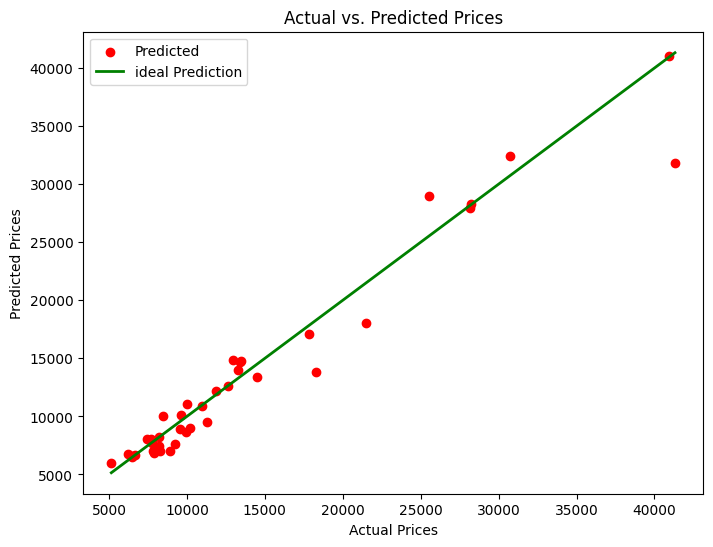

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='-', linewidth=2, label='ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()